**Introduction**

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

**How the Random Forest Algorithm Works**

The following are the basic steps involved in performing the random forest algorithm:

1.   Pick N random records from the dataset.
2. Build a decision tree based on these N records.
3. Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
4. In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.



**Advantages of using Random Forest**

As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1. **The random forest algorithm is not biased**, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.
2. **This algorithm is very stable**. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.
3. **The random forest algorithm works well when you have both categorical and numerical features.**
4. **The random forest algorithm also works well when data has missing values** or it has not been scaled well (although we have performed feature scaling in this article just for the purpose of demonstration).


**Disadvantages of using Random Forest**

1. A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.
2. Due to their complexity, they require much more time to train than other comparable algorithms.


----------------------------------------------------------------------------------------------------------------------------------------------

**Part 1: Using Random Forest for Regression**


**Problem Definitiont**

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Business-petrol_consumption-RandomForest/petrol_consumption.csv')

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


We can see that the values in our dataset are not very well scaled. We will scale them down before training the algorithm.



**1. divide data into 'attributes' and 'label' sets.**

In [ ]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [ ]:
X

array([[9.0000e+00, 3.5710e+03, 1.9760e+03, 5.2500e-01],
       [9.0000e+00, 4.0920e+03, 1.2500e+03, 5.7200e-01],
       [9.0000e+00, 3.8650e+03, 1.5860e+03, 5.8000e-01],
       [7.5000e+00, 4.8700e+03, 2.3510e+03, 5.2900e-01],
       [8.0000e+00, 4.3990e+03, 4.3100e+02, 5.4400e-01],
       [1.0000e+01, 5.3420e+03, 1.3330e+03, 5.7100e-01],
       [8.0000e+00, 5.3190e+03, 1.1868e+04, 4.5100e-01],
       [8.0000e+00, 5.1260e+03, 2.1380e+03, 5.5300e-01],
       [8.0000e+00, 4.4470e+03, 8.5770e+03, 5.2900e-01],
       [7.0000e+00, 4.5120e+03, 8.5070e+03, 5.5200e-01],
       [8.0000e+00, 4.3910e+03, 5.9390e+03, 5.3000e-01],
       [7.5000e+00, 5.1260e+03, 1.4186e+04, 5.2500e-01],
       [7.0000e+00, 4.8170e+03, 6.9300e+03, 5.7400e-01],
       [7.0000e+00, 4.2070e+03, 6.5800e+03, 5.4500e-01],
       [7.0000e+00, 4.3320e+03, 8.1590e+03, 6.0800e-01],
       [7.0000e+00, 4.3180e+03, 1.0340e+04, 5.8600e-01],
       [7.0000e+00, 4.2060e+03, 8.5080e+03, 5.7200e-01],
       [7.0000e+00, 3.7180e+03,

In [ ]:
y

array([541, 524, 561, 414, 410, 457, 344, 467, 464, 498, 580, 471, 525,
       508, 566, 635, 603, 714, 865, 640, 649, 540, 464, 547, 460, 566,
       577, 631, 574, 534, 571, 554, 577, 628, 487, 644, 640, 704, 648,
       968, 587, 699, 632, 591, 782, 510, 610, 524])

**2. let's divide the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**3. Feature Scaling**

We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**4. Training the Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

**5. Evaluating the Algorithm**

For regression problems the metrics used to evaluate an algorithm are **mean absolute error**, **mean squared error**, and **root mean squared error**. 

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.33899999999999
Mean Squared Error: 3494.2330150000003
Root Mean Squared Error: 59.112037818028234


With 20 trees, the root mean squared error is 64.93 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

**6. Modifiying the model**

If the number of estimators is changed to 200, the results are as follows:



In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.33899999999999
Mean Squared Error: 3494.2330150000003
Root Mean Squared Error: 59.112037818028234


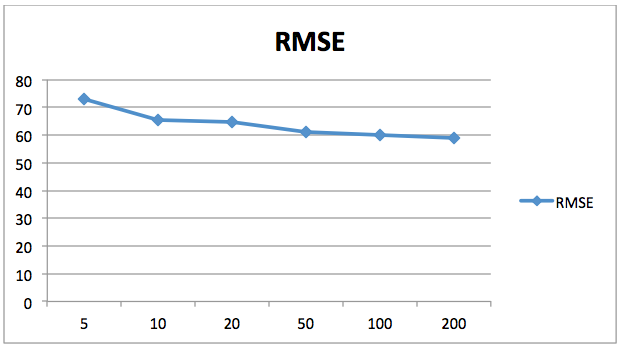

We can see that the error values decreases with the increase in number of estimator. After 200 the rate of decrease in error diminishes, so therefore 200 is a good number for n_estimators.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**Part 2: Using Random Forest for Classification**

**Problem Definition**



The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.


This is a binary classification problem and we will use a random forest classifier to solve this problem. Steps followed to solve this problem will be similar to the steps performed for regression.



Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/Business-petrol_consumption-RandomForest/bill_authentication.csv')

In [ ]:
df1

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df1['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

1. Preparing data

In [ ]:
X = df1.iloc[:, 0:4].values
y = df1.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

2. Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3. Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
       0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
       1.  , 1.  , 0.  , 0.  , 1.  , 0.95, 1.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.1 , 1.  , 1.  ,
       0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 1.  , 0.95, 0.  , 0.85, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 1.  , 0.95, 1.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
       0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  ,
       0.  , 1.  , 1.  , 0.55, 1.  , 1.  , 0.  , 0.55, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
       1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.

In [ ]:
y_pred = y_pred.round()

4. Evaluating

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[155   2]
 [  0 118]]


In [ ]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_authentic', 'isnot_authentic'],
                         columns=['predicted_authentic','predicted_notauthentic'])
confusion

,predicted_authentic,predicted_notauthentic
is_authentic,118,0
isnot_authentic,2,155


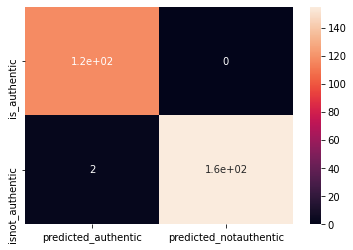

In [ ]:
import seaborn as sns
sns.heatmap(confusion, annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
print(accuracy_score(y_test, y_pred))

0.9927272727272727


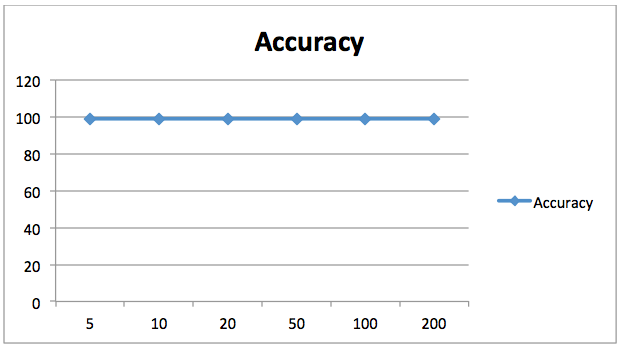

98.90% is a pretty good accuracy, so there isn't much point in increasing our number of estimators anyway. We can see that increasing the number of estimators did not further improve the accuracy.